In [117]:
# usual imports in a classic ML pipeline for Regression
# pip install numpy
# pip install pandas
# pip install seaborn
# pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [118]:
# load the data
df = pd.read_csv("diamonds.csv")

# drop the extra Unnamed -column
df = df.drop("Unnamed: 0", axis=1)

# let's quickly see the first 5 rows of data
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### STEP 2: Handle missing/duplicate values and HANDLE ALL CATEGORICAL VARIABLES CORRECTLY

**Case 1: Binary variabels (categories with exactly two options)**

In [119]:
# no binary variables in this dataset

**Case 2: Ordinal variables (categories that have an order/rank -> can be compared)**

In [120]:
# ordinal category = text category where the options have an order
# of magnitude between the options (comparable numerically)

# apparently using replace in this context is deprecated approach
# for future reasons, probably better use the map-function

# variable 1: cut
cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
df['cut'] = df['cut'].map(cut_mapping)

# variable 2: color
color_mapping = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
df['color'] = df['color'].map(color_mapping)

# variable 3: clarity
clarity_mapping = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}
df['clarity'] = df['clarity'].map(clarity_mapping)

**Case 3: Nominal categories (categories that can't be compared numerically)**

In [121]:
# no nominal categories in this dataset

In [122]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


**Final touches before model training -> duplicates and missing values**

In [123]:
# check duplicates and missing values
df.duplicated().sum()

np.int64(146)

In [124]:
# drop the duplicates
df = df.drop_duplicates()

In [125]:
# check again duplicates, should be 0
df.duplicated().sum()

np.int64(0)

In [126]:
# no missing values apparently, this data is good to GO
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### STEP 3: Data is good to go (all numbers) => train model etc.

In [127]:
# first step, we split our data into SUPPORT variables and the TARGET variable
# X => support variables, y => target variable

# X => list of support variables the model uses 
# while predicting the target variable with the model
X = df.drop("price", axis=1)

# our target variable is y
y = df['price']

In [128]:
# secondly, train/test -split with scikit-learn's helper function
# 0.3 for testing => 30% of data is reserved for testing purposes
# and based on that => it's deduced that 70% will be in the training data

# you can also define the random state, which is sometimes useful
# if you want to "lock down" all the randomness in order to get same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [129]:
# create the model and train it with the data
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [130]:
# we need to create test predictions based on our earlier reserved test dataset
# this data has never been seen by the model by now
predictions = model.predict(X_test)

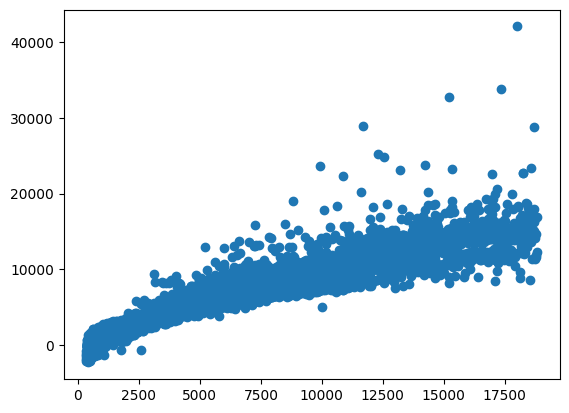

In [131]:
# let's plot how far the predictions are from the real target values (y)
# in the test dataset

# if the values follow a diagonal line (from bottom left to top right)
# => we have good predictions with the model
# we basically compare the predicted values to the actual true values 
# and compare the differences
plt.scatter(y_test, predictions)
plt.show()

In [132]:
# MAE = Mean average error
mae = metrics.mean_absolute_error(y_test, predictions)
print("MAE:")
print(f"{round(mae, 2)} $")

# MSE = Mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
print("\nMSE:")
print(f"{round(mse, 2)} $^2")

# RMSE = Root Mean Squared Error
rmse = np.sqrt(mse)
print("\nRMSE:")
print(f"{round(rmse, 2)} $")

# R-square (or R2) - how well the model describes the original dataset
# 1 => model describes the data perfectly
# 0 => model doesn't describe the data at all
r2 = metrics.r2_score(y_test, predictions)
print("\nR-squared:")
print(f"{round(r2, 2)}")


MAE:
807.4 $

MSE:
1519357.34 $^2

RMSE:
1232.62 $

R-squared:
0.9


C:\Users\tuomas.valtanen\AppData\Local\Temp\ipykernel_17720\2920752686.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


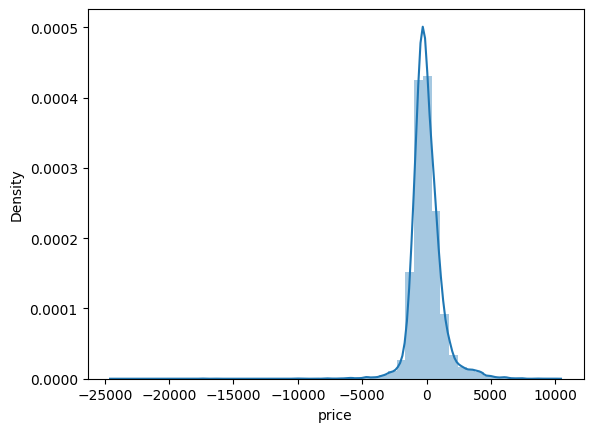

In [133]:
# if the prediction distribution is far from standard normal distritbuion
# then the model is not probably good enough
# distplot is deprecated and will be removed in future seaborn versions
# but not direct replacement has been created so far
sns.distplot((y_test - predictions))
plt.show()
plt.close()

It seems the picture above is problematic, we can actually get even negative diamond prices with this model!

In [134]:
# let's get the list of our support variables
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='str')

In [135]:
# example data, just to see what kind of values
# are typically used in this dataset
df.sample(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
33696,0.33,5,4,7,61.7,55.0,838,4.44,4.48,2.75


In [136]:
# usually in GUI application we save the model-object / variable into a file (by using joblib-module)
# and in the GUI application => we load the saved model from the file
# and use the model just like here below

# map all the variables from the user
# into a Python dictionary
# the variable names have to match with the original dataset
tester_row = {
    'carat': 0.81, 
    'cut': 3, 
    'color': 4, 
    'clarity': 2, 
    'depth': 62.9, 
    'table': 56.9, 
    'x': 5.89, 
    'y': 5.96, 
    'z': 3.73
}

# convert to pandas format
tester_row = pd.DataFrame([tester_row])

In [137]:
# get the output/result from the model
# based on the user's given new data (above code cell)
result = model.predict(tester_row)[0]

print()
print(f"Predicted price for this DIAMOND:")
print(f"$ {round(float(result), 2)}")
print("----------------------------")


Predicted price for this DIAMOND:
$ 2573.64
----------------------------
